# Análisis del Conjunto de Datos Iris

En este ejercicio, trabajarás con el famoso conjunto de datos Iris para realizar agrupamiento, reducción de dimensionalidad y clasificación basada en redes neuronales. Sigue la hoja de ruta y completa los espacios en blanco donde se indique.

## Parte 1: Tarea del Estudiante

### 1. Descargar el Conjunto de Datos Iris

**Pregunta:** ¿Cuáles son las principales características del conjunto de datos Iris y qué representan?

---

Completa el código a continuación para descargar el conjunto de datos Iris usando `sklearn.datasets`. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [72]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
features = data.feature_names
names = data.target_names

# Imprimir tipo de dato y tamaño de X e y
print(f'X es de tipo {type(X)} con un tamaño de {X.shape} y el tipo de dato que contiene es: {X.dtype}')
print(f'y es de tipo {type(y)} con un tamaño de {y.shape} y el tipo de dato que contiene es: {y.dtype}')

# Imprimir # de clases de flores
print(f'El número de clases de flores es: {len(names)}')


X es de tipo <class 'numpy.ndarray'> con un tamaño de (150, 4) y el tipo de dato que contiene es: float64
y es de tipo <class 'numpy.ndarray'> con un tamaño de (150,) y el tipo de dato que contiene es: int64
El número de clases de flores es: 3


### 2. Agrupamiento con K-Means

**Pregunta:** ¿Cómo funciona el algoritmo K-Means? ¿Cuál es la importancia del número 'K' en K-Means?

---

Completa el código a continuación para realizar el agrupamiento K-Means en el conjunto de datos Iris y visualizar los grupos. Intenta determinar si los grupos coinciden con los tipos reales de flores.

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Realizar el agrupamiento K-Means con k igual al número de tipos de flores

k = len(names) # Número de clusters igual al número de clases de flores

kmeans = KMeans(n_clusters = k) # Creamos el modelo con el número de clusters determinados

kmeans.fit(X) # Entrenamos el modelo con las variables del conjunto X

centers = kmeans.cluster_centers_ # Obteniendo los centroides de los clústeres

y_kmeans = kmeans.predict(X) # Prediciendo los clusters

/home/daniel/Studies/DataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


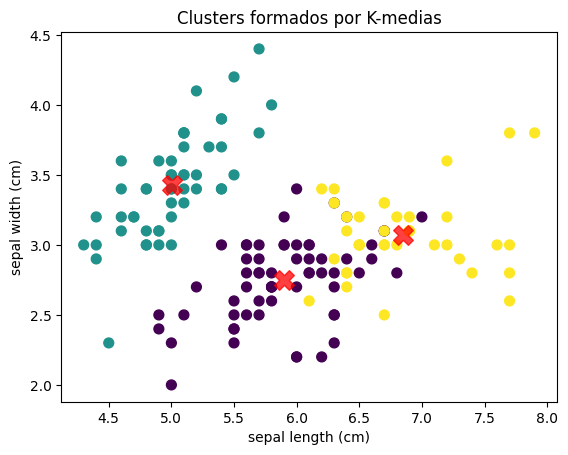

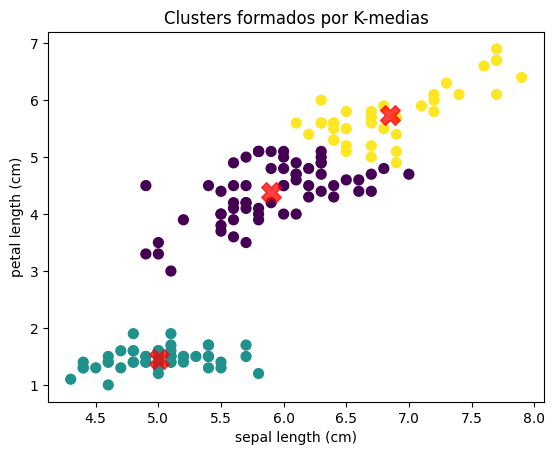

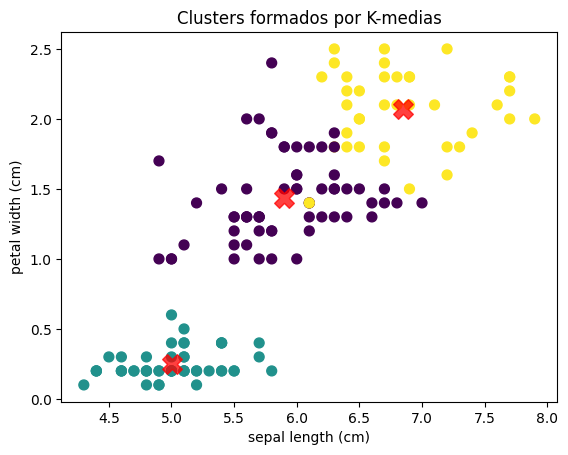

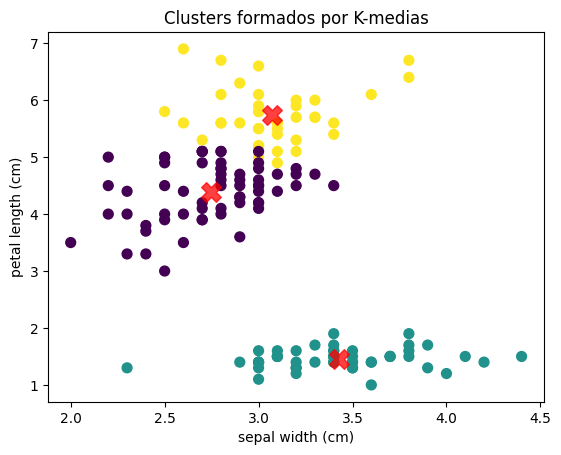

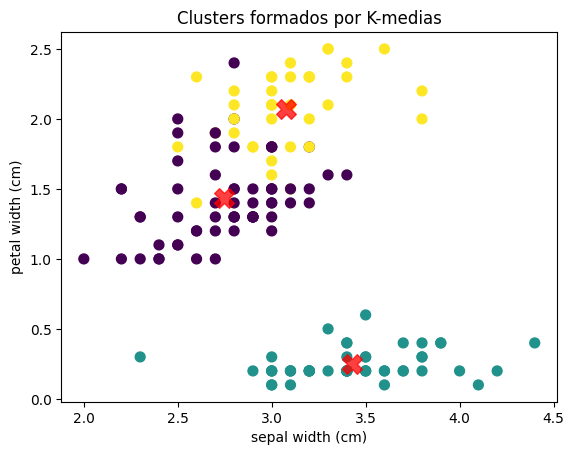

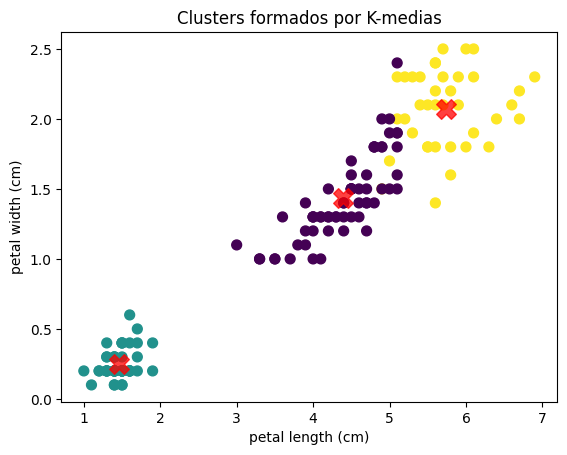

In [93]:
# Visualizar los grupos (puedes tomar dos dimensiones al azar)
for i in range(4):
    for j in range(4):
        if i >= j:
            continue
        else:
            plt.scatter(X[:, i], X[:, j], c = y_kmeans, s = 50, cmap = 'viridis')
            plt.scatter(centers[:, i], centers[:, j], c = 'red', s = 200, alpha = 0.75, marker = 'X')
            plt.title('Clusters formados por K-medias')
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.show()
            plt.close()

In [92]:
# Revisar la capacidad predictiva
porc_acierto = sum(y == y_kmeans) / len(y) * 100 # Porcentaje de acierto
print(f'El porcentaje de acierto del modelo es de un {round(porc_acierto, 2)}%')

El porcentaje de acierto del modelo es de un 24.0%


### 3. PCA (Análisis de Componentes Principales)

**Pregunta:** ¿Cuál es el propósito principal de PCA? ¿Cómo ayuda en la reducción de dimensionalidad?

---

Completa el código a continuación para realizar PCA en el conjunto de datos Iris y reducir sus características a dos dimensiones. Visualiza los datos en el espacio de características reducido.

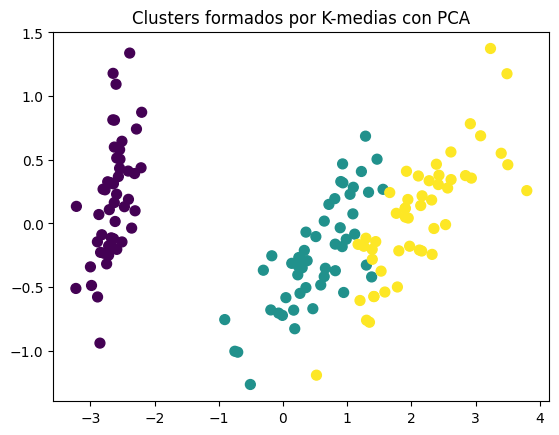

In [113]:
from sklearn.decomposition import PCA

# Realizar PCA y reducir las características a dos dimensiones

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

# centers_pca = kmeans.cluster_centers_ # Obteniendo los centroides de los clústeres

# Visualizar los datos en el espacio de características reducido

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, s = 50, cmap = 'viridis')
plt.title('Clusters formados por K-medias con PCA')
plt.show()
plt.close()

### 4. Red Neuronal con PyTorch

**Pregunta:** ¿Por qué se considera que las redes neuronales son aproximadores universales de funciones?

---

Completa el código a continuación para crear una red neuronal simple usando PyTorch. La red debe predecir el tipo de flores a partir de las dos características de PCA. Asegúrate de que la red neuronal tenga solo una capa oculta de tamaño 3.

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim

# TODO: Define la red neuronal con una capa oculta de tamaño 3

import torch.nn.functional as F

# TODO
# Define la red neuronal con una capa oculta de tamaño 3
n = 3

class Red(nn.Module):
    def __init__(self):
        super(Red, self).__init__()
        self.fc1 = nn.Linear(2, n)  # 2 características de entrada, 3 neuronas en la capa oculta
        self.fc2 = nn.Linear(n, 3)  # 3 neuronas en la capa oculta, 3 clases de salida

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


# TODO: Entrena la red neuronal con las características de PCA

# ...

ModuleNotFoundError: No module named 'torch'

### Evaluación del Modelo en el Conjunto de Prueba

Dividiremos el conjunto de datos en conjuntos de entrenamiento y prueba. Después de entrenar el modelo en el conjunto de entrenamiento, evaluaremos su precisión en el conjunto de prueba.

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

# Inicializar la red neuronal, función de pérdida y optimizador
modelo = Red()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelo.parameters(), lr=0.01)

#TODO
# Entrenar el modelo en el conjunto de entrenamiento
# Bucle de entrenamiento
# num_epochs = ...
for epoch in range(num_epochs):
    # Forward pass

    # outputs = Aplicamos el modelo al tensor X de entrenamiento
    # loss = comparamos y train tensor con los outputs

    # Backward pass y optimización

    # optimizer...
    # loss...
    # optimizer...

    # Imprimir pérdida cada 100 épocas
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Entrenamiento completado.')



In [ ]:

# Evaluar el modelo en el conjunto de prueba
with torch.no_grad():
    # test_outputs = ...
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)

print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


### 5. Clasificación de una Nueva Flor


Completa el código a continuación para permitir que el usuario introduzca las características de una nueva flor y clasificarla usando la red neuronal entrenada.

In [ ]:
# TODO: Define una función para clasificar una nueva flor basada en sus características

# def clasificar_flor(caracteristicas):
#     ...

# TODO: Permite la entrada del usuario para las características de la flor y clasifícala

# ...

## Pregunta 6:
Si la flor tiene las siguientes características:

sepal length (cm) = 5.9

sepal width (cm) = 3.0

petal length (cm) = 5.1

petal width (cm)  = 1.8

¿Cuál es el nombre de la flor que predice el modelo construido?